# Задание 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.manifold import TSNE
from sklearn.datasets import load_boston
boston = load_boston()
for line in boston.DESCR.split('\n'):
    print(line)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
data = boston.data
feature_names  = boston.feature_names
feature_names
X = pd.DataFrame(data, columns = feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
target = boston.target
y = pd.DataFrame(target, columns =['price'])
y.head()


,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size = 0.2, random_state = 42)  
X_train.shape, X_test.shape,y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

# Масштабирование признаков

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names )

# модель TSNE на тренировочный данных с параметрами:


In [9]:
tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_train_tsne

array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

In [10]:
X_train_tsne.shape

(404, 2)

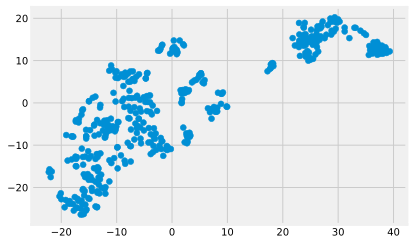

In [11]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1])

# Задание 2


In [14]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
labels_train = kmeans.fit_predict(X_train_scaled)
pd.value_counts(labels_train)

1    191
0    128
2     85
dtype: int64

Text(-10, -20, 'Кластер 2')

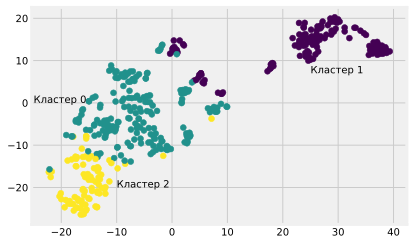

In [27]:
plt.scatter(X_train_tsne[:,0], X_train_tsne[:,1], c = labels_train)
plt.text(-25, 0, 'Кластер 0')
plt.text(25, 7, 'Кластер 1')
plt.text(-10, -20, 'Кластер 2')

#  ИСПОЛЬЗОВАНИЕ ИНФОРМАЦИИ ПОЛУЧЕННОЙ С ПОМОЩЬЮ T-SNE В МОДЕЛЯХ

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
y_test_pred = lr.predict(X_test_scaled)
y_test_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [102]:
from sklearn.metrics import r2_score
from statistics import mean

# y_test.shape
# y_test_pred.shape
r2_score(y_test, y_test_pred)


0.33082069906235845


# Вычислите средние значения price и CRIM в разных кластерах.

In [43]:
mean(X_train.loc[labels_train == 0, 'CRIM'])

10.7152190625

In [45]:
mean(X_train.loc[labels_train == 1, 'CRIM'])

0.4209855497382199

In [51]:
mean(X_train.loc[labels_train == 2, 'CRIM'])

0.0721184705882353

In [56]:
y_train[labels_train == 0]

array([12. , 13.4,  8.7, 27.5, 11.7,  8.8, 15.6, 17.8, 16.1,  8.5, 17. ,
       17.1, 14.3, 12.6, 19.1, 25. ,  5. , 14.6, 20.1, 23.2, 11.8, 13.8,
       12.3, 17.8, 13.4, 14.4, 50. , 19.9, 12.7,  5.6, 16.7, 13.8, 15.3,
       14.1, 21.8, 21.7,  8.3, 10.5, 16.7, 17.8, 50. , 13.1, 21.9, 21.5,
        8.5,  8.8, 13.3, 13.3, 15.6, 12.5, 14.6, 11. ,  8.1, 15.6, 20.6,
       15. ,  6.3, 20.8, 14.3, 11.7, 10.4, 23. , 22.7, 50. ,  8.4, 20.6,
       13.5, 17.4, 11.9, 16.2,  7.2, 13.8, 13. , 18.4, 23.1,  8.3, 13.4,
       12.1, 13.9, 11.3, 10.5, 23.2,  7.5, 17.8, 14.1, 10.2, 15.2, 13.8,
        9.5, 13.3, 18.1, 18. , 25. , 20.1, 13.1, 10.2, 19.9, 27.9, 12.8,
       19.5, 21.4,  7.2, 11.5, 14.9, 15.2,  8.4, 14.5, 10.9, 21.9, 21.4,
        7.4, 15.6, 19.1, 16.8, 17.7, 11.8, 20.2, 20. , 15.4,  7.2, 16.3,
       15.4, 19.6, 22.6, 50. , 14.9, 19. , 13.4])

In [57]:
y_train[labels_train == 1]

array([19.9, 18.2, 24.6, 21.1, 20.7, 36.2, 31.6, 39.8, 13.9, 21.8, 17.6,
       19.2, 20.4, 37.9, 15.7, 14.5, 18.7, 20.6, 15.6, 17.5, 19.3, 20.6,
       14.5, 50. , 28.7, 21.2, 19.3, 23.1, 33.4, 29.6, 18.7, 21.7, 23.1,
       22.8, 21. , 48.8, 16.6, 27.1, 19.8, 21. , 41.3, 20.4, 18.5, 29.4,
       24.4, 26.7, 23.8, 17.5, 19.4, 22.9, 27.5, 25. , 50. , 31.7, 24.1,
       22.1, 19.3, 46.7, 43.1, 31.5, 20. , 20.5, 22.8, 28.7, 30.7, 22.9,
       23.9, 24.3, 24.6, 26.4, 23.1, 15. , 19.3, 23.9, 24.7, 19.8, 23.8,
       27.1, 17.3, 21.4, 38.7, 20.5, 32.5, 21.4, 28.4, 30.1, 23. , 20.3,
       21.7, 18.8, 37.2, 16.1, 16.5, 22.2, 48.3, 23.8, 22.7, 36. , 41.7,
       18.3, 22. , 44.8, 18.7, 20.4, 21.2, 23.1, 26.6, 50. , 23.3, 21.7,
       18.9, 18.4, 17.4, 21.7, 28.4, 29.9, 24.4, 36.2, 27.5, 37.6, 28.1,
       19.1, 43.8, 25. , 16. , 16.6, 13.2, 50. , 22.2, 14.8, 24.3, 33.8,
       50. , 16.5, 23. , 18.2, 23.3, 22. , 18.5, 25.1, 22.5, 22.4, 28.6,
       24.5, 20.7, 50. , 28.7, 20.3, 30.1, 19.5, 21

In [58]:
y_train[labels_train == 2]

array([19.4, 24.7, 23.7, 24.4, 25.3, 23.1, 45.4, 22.6, 31.6, 29.1, 22.5,
       19.4, 36.4, 33.1, 22. , 31.1, 26.2, 36.1, 22.9, 24.5, 34.9, 42.8,
       32.2, 26.4, 33.3, 23.2, 19.6, 32.7, 29. , 34.6, 24.8, 23.3, 32. ,
       30.1, 42.3, 24.3, 22. , 18.2, 20.1, 37.3, 17.1, 30.3, 18.6, 22. ,
       23.5, 50. , 22.2, 26.6, 20.5, 22. , 26.6, 46. , 21.9, 44. , 27.9,
       32.9, 22.3, 22.2, 33. , 24.8, 34.9, 35.1, 24.8, 33.1, 22.9, 24.1,
       24.7, 37. , 23.4, 28. , 25. , 20.1, 23.7, 18.9, 19.7, 34.9, 32. ,
       23.3, 31.2, 29.6, 33.2, 30.5, 23.9, 29.8, 24.5])

In [59]:
mean(y_train[labels_train == 0])

16.1796875

In [60]:
mean(y_train[labels_train == 1])

27.874117647058824

In [61]:
mean(y_train[labels_train == 2])

27.874117647058824

# Задание 3 Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.


In [122]:
# mean(X_test.loc[labels_train == 0, 'CRIM'])
# X_test['CRIM']


# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters = 3)
# labels_train = kmeans.fit_predict(X_test_scaled)
# pd.value_counts(labels_train)


tsne = TSNE(n_components = 2, learning_rate = 250, random_state = 42)
X_test_tsne = tsne.fit_transform(X_test_scaled)
# X_test_tsne

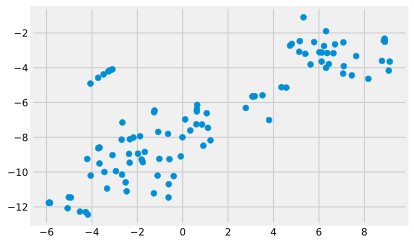

In [113]:
plt.scatter(X_test_tsne[:,0], X_train_tsne[:,1])

In [114]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3)
labels_test = kmeans.fit_predict(X_test_tsne)
pd.value_counts(labels_test)

1    38
2    33
0    31
dtype: int64

Text(6, -6, 'Кластер 2')

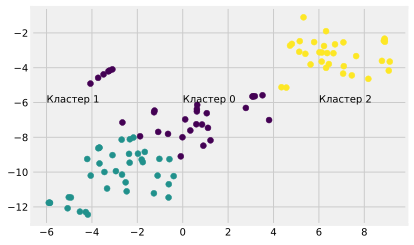

In [115]:
plt.scatter(X_test_tsne[:,0], X_test_tsne[:,1], c = labels_test)
plt.text(0, -6, 'Кластер 0')
plt.text(-6, -6, 'Кластер 1')
plt.text(6, -6, 'Кластер 2')


In [104]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_test_tsne, y_test)

LinearRegression()

In [116]:
y_test_pred = lr.predict(X_test_tsne)
y_test_pred

array([23.134684, 25.85672 , 17.896936, 26.43326 , 15.791451, 23.723707,
       22.408028, 18.81024 , 16.631077, 21.776917, 24.863571, 23.563665,
       13.152996, 24.547558, 23.341541, 16.453695, 19.695536, 14.771993,
       29.303234, 15.478968, 26.64938 , 27.194405, 21.691767, 21.65419 ,
       15.219102, 15.741997, 25.369871, 12.860214, 24.92443 , 22.011782,
       22.784626, 24.58059 , 15.204222, 16.342136, 15.569508, 18.899416,
       24.390726, 24.892044, 25.169971, 26.417297, 21.412085, 23.723314,
       29.353003, 25.86827 , 23.652473, 15.833616, 21.764547, 26.475376,
       16.405437, 24.048473, 23.609196, 24.805763, 21.800606, 22.032795,
       24.25135 , 16.927504, 15.692054, 28.433805, 24.813873, 25.918644,
       26.699383, 28.643463, 25.981396, 25.086424, 27.940039, 24.727423,
       15.50782 , 26.568039, 28.347832, 12.869221, 25.373066, 16.825476,
       14.308479, 27.888695, 24.84569 , 14.130837, 21.577284, 29.315956,
       15.022007, 17.699572, 26.073881, 14.973688, 

In [117]:
# y_test.shape
# y_test_pred.shape
r2_score(y_test, y_test_pred)

0.33082069906235845

In [119]:
mean(X_test.loc[labels_train == 0, 'CRIM'])

0.040703333333333334

In [120]:
mean(X_test.loc[labels_train == 1, 'CRIM'])

9.419181842105264

In [121]:
mean(X_test.loc[labels_train == 2, 'CRIM'])

0.2192969090909091

In [123]:
mean(y_test[labels_train == 0])

34.31111111111111

In [124]:
mean(y_test[labels_train == 1])

16.710526315789473

In [125]:
mean(y_test[labels_train == 2])

22.69090909090909